# Part 1: Data preprocessing

dataset: https://www.kaggle.com/mirichoi0218/insurance

1. Importing the libraries
2. Importing the dataset
3. Dealing with missing data
4. Encoding categorical variables
5. Splitting the dataset into train and test set
6. Feature scaling

## Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('insurance.csv')

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.shape

(1338, 7)

## Exploratory Data Analysis

In [7]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Group the dataset by 'sex', 'smoker' and 'region'

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
numeric_columns = dataset.select_dtypes(include=['number']).columns

dataset_sex = dataset.groupby(by='sex')
mean_values = dataset_sex[numeric_columns].mean()
mean_values

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [12]:
numeric_columns = dataset.select_dtypes(include=['number']).columns

dataset_sex = dataset.groupby(by='smoker')
mean_values = dataset_sex[numeric_columns].mean()
mean_values

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [13]:
numeric_columns = dataset.select_dtypes(include=['number']).columns

dataset_sex = dataset.groupby(by='region')
mean_values = dataset_sex[numeric_columns].mean()
mean_values
# Seems like south east region has the highest charges and body mass index

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Dealing with the missing data

In [14]:
# check if there are any null values
dataset.isnull().values.any()

False

In [16]:
# check how many null values
dataset.isnull().values.sum()

0

## Encoding the categorical data

In [17]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [19]:
len(dataset.select_dtypes(include='object').columns)

3

In [20]:
# check unique values in each column

In [21]:
# Check the unique values in column 'sex'
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [22]:
# Check the unique values in column 'smoker'
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
# Check the unique values in column 'region'
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
dataset = pd.get_dummies(data=dataset, drop_first=True)

In [25]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [26]:
dataset.shape

(1338, 9)

## Correlation matrix and Heatmap

In [27]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Correlation with charges'}>

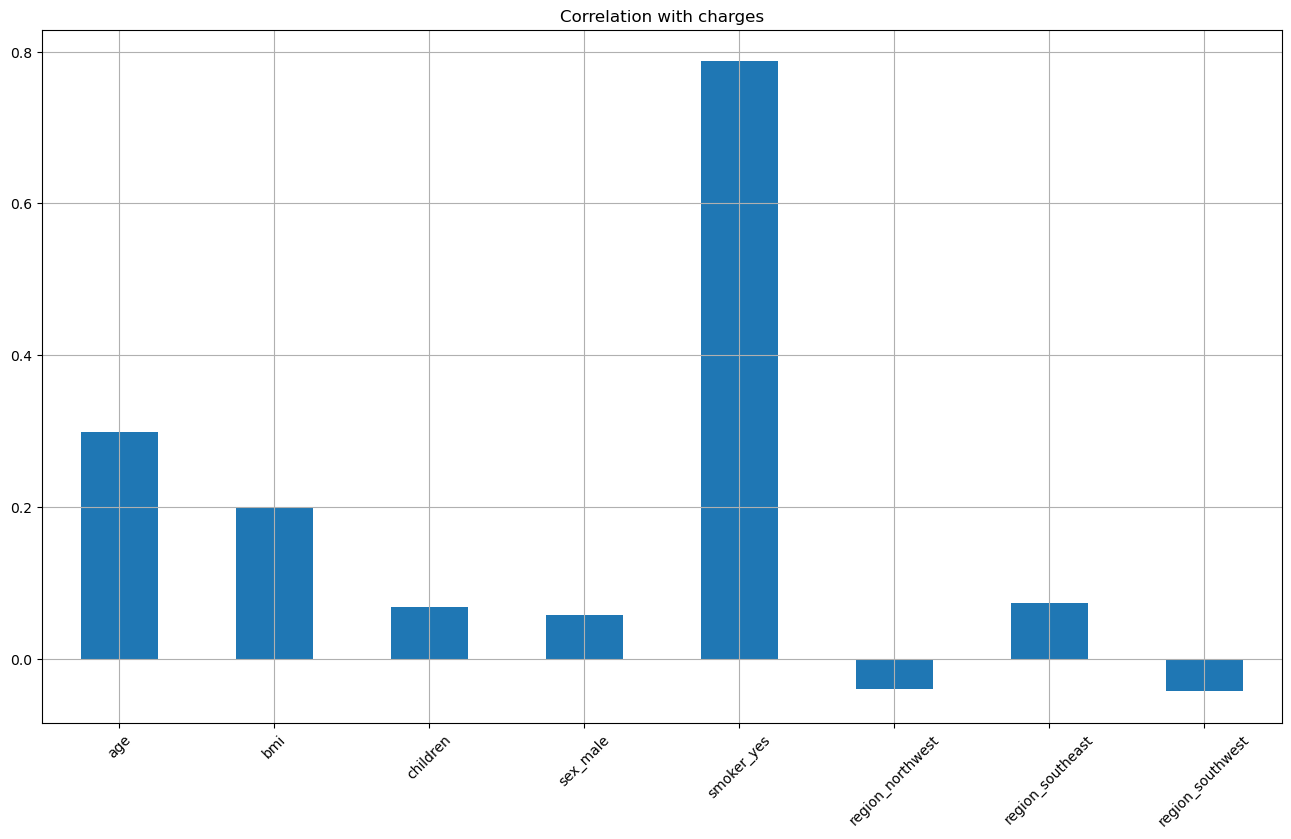

In [28]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title = 'Correlation with charges', 
    rot = 45, grid = True
)

In [29]:
# Create Correlation Matrix
corr = dataset.corr()

In [30]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


<Axes: >

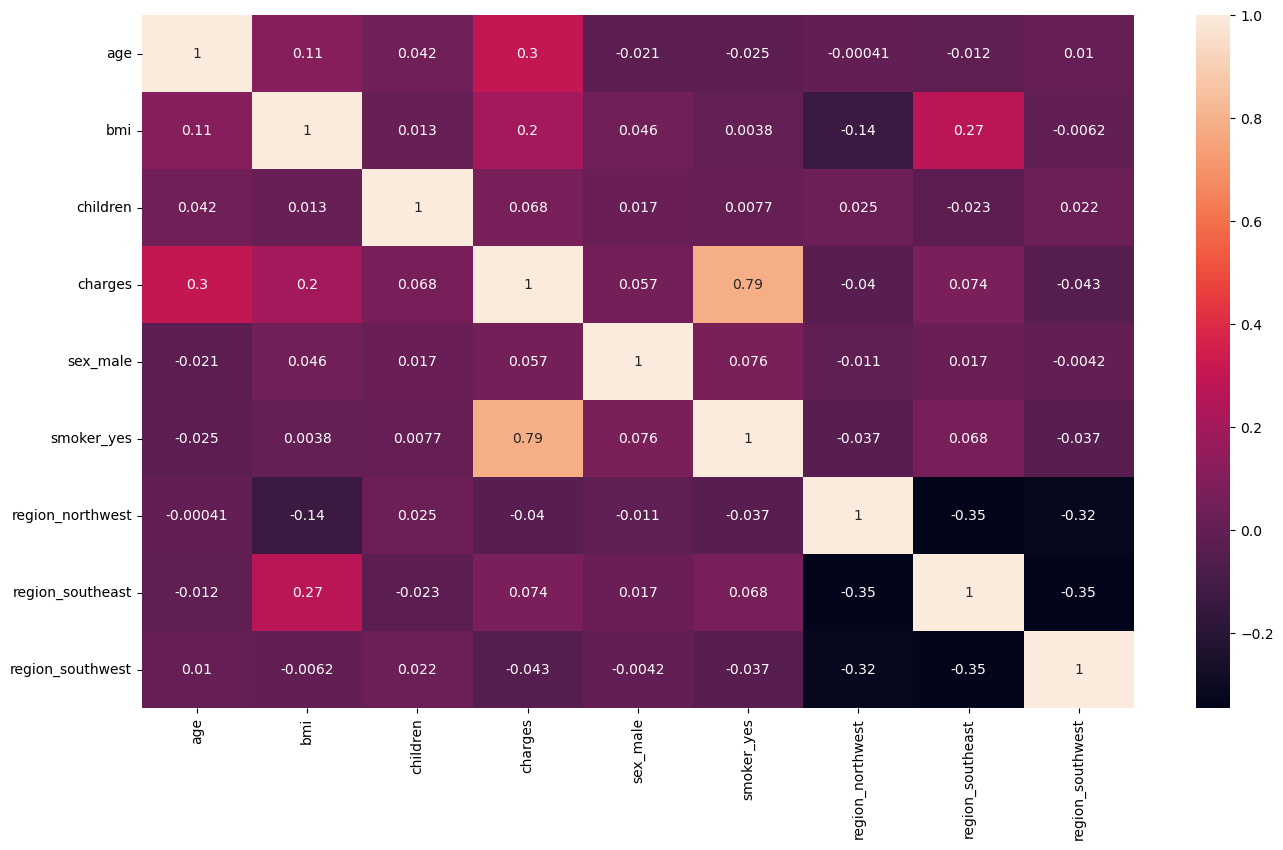

In [31]:
# correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the dataset into train and test set

In [32]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [33]:
# matrix of features / inependent variables
x = dataset.drop(columns='charges')

In [34]:
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [35]:
# dependent variable vector
y = dataset.iloc[:, 3:4].values

In [36]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [38]:
x_train.shape

(1070, 8)

In [39]:
x_test.shape

(268, 8)

In [40]:
y_train.shape

(1070, 1)

In [41]:
y_test.shape

(268, 1)

## Feature scaling

In [42]:
# there is an implicit equation i.e. implicit relationship between the dependent variable Y and the
# features X
# not explecit relationship like multiple linear regression

# so we have to apply feature scaling in SVR

In [46]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

# Part 2: Building the model

## 3) Support vector regression

In [40]:
from sklearn.svm import SVR
regressor_sv = SVR(kernel='rbf', degree=3)
regressor_sv.fit(x_train,y_train)

# kernel='rbf': it is non linear kernel

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred = sc_y.inverse_transform(regressor_sv.predict(sc_x.transform(x_test)))

In [42]:
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [43]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8575248736509351

## 4) XGBoost regression

In [72]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train,y_train)

[13:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

In [45]:
y_pred = sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(x_test)))

In [46]:
# R^2 (coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8621817830938563

# Part 3: Predict charges for a new customer

## Example 1

Name: Frank, age: 40, sex: 1, bmi:45.50, children:4, smoker:1, region:northeast


In [47]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [48]:
data = {'age':40,
        'bmi':45.50,
        'children':4,
        'sex':1,       
        'smoker':1,
        'region_northwest':0,
        'region_southeast':0,
        'region_southwest':0
}

In [49]:
df_frank = pd.DataFrame(data=data, index=[1])

In [50]:
df_frank

,age,bmi,children,sex,smoker,region_northwest,region_southeast,region_southwest
1,40,45.5,4,1,1,0,0,0


In [51]:
frank_pred = sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(df_frank)))

In [52]:
print(' The medical insurance cost for Frank is: {} '.format(frank_pred))

 The medical insurance cost for Frank is: [38005.016] 


## Example 2

In [53]:
data = {'age':19,
        'bmi':27.9,
        'children':0,
        'sex':0,       
        'smoker':1,
        'region_northwest':0,
        'region_southeast':0,
        'region_southwest':1
}

In [54]:
df = pd.DataFrame(data=data, index=[1])

In [55]:
df

,age,bmi,children,sex,smoker,region_northwest,region_southeast,region_southwest
1,19,27.9,0,0,1,0,0,1


In [56]:
sc_y.inverse_transform(regressor_xgb.predict(sc_x.transform(df)))
# original value: # 16884.92400	

array([19856.746], dtype=float32)